<a href="https://colab.research.google.com/github/WaleedSharkas/hackerfile/blob/master/Clean_And_Analyze_Employee_Exit_Surveys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clean And Analyze Employee Exit Surveys
This  project will look at survey data from the Department of Education, Training and Employment [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the Technical and Further Education [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) body of the Queensland government in Australia.

We will combine the results from both suverys to answer a certain question:


*   Are employees who only worked for the institutes for a short period 
of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?





In [1]:
from google.colab import files
uploaded = files.upload()

Saving dete.csv to dete (1).csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving tafe.csv to tafe (1).csv


In [3]:
import pandas as pd
import numpy as np

In [4]:
dete_survey = pd.read_csv('dete.csv', encoding='Latin-1')
tafe_survey = pd.read_csv('tafe.csv', encoding='Latin-1')

In [5]:
pd.options.display.max_columns = 150
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [7]:
dete_survey.shape

(822, 56)

# Missing/ Null Values in DETE

It seems there is alot of missing information in DETE, this should be analyzed further to see if there is anything alarming. 

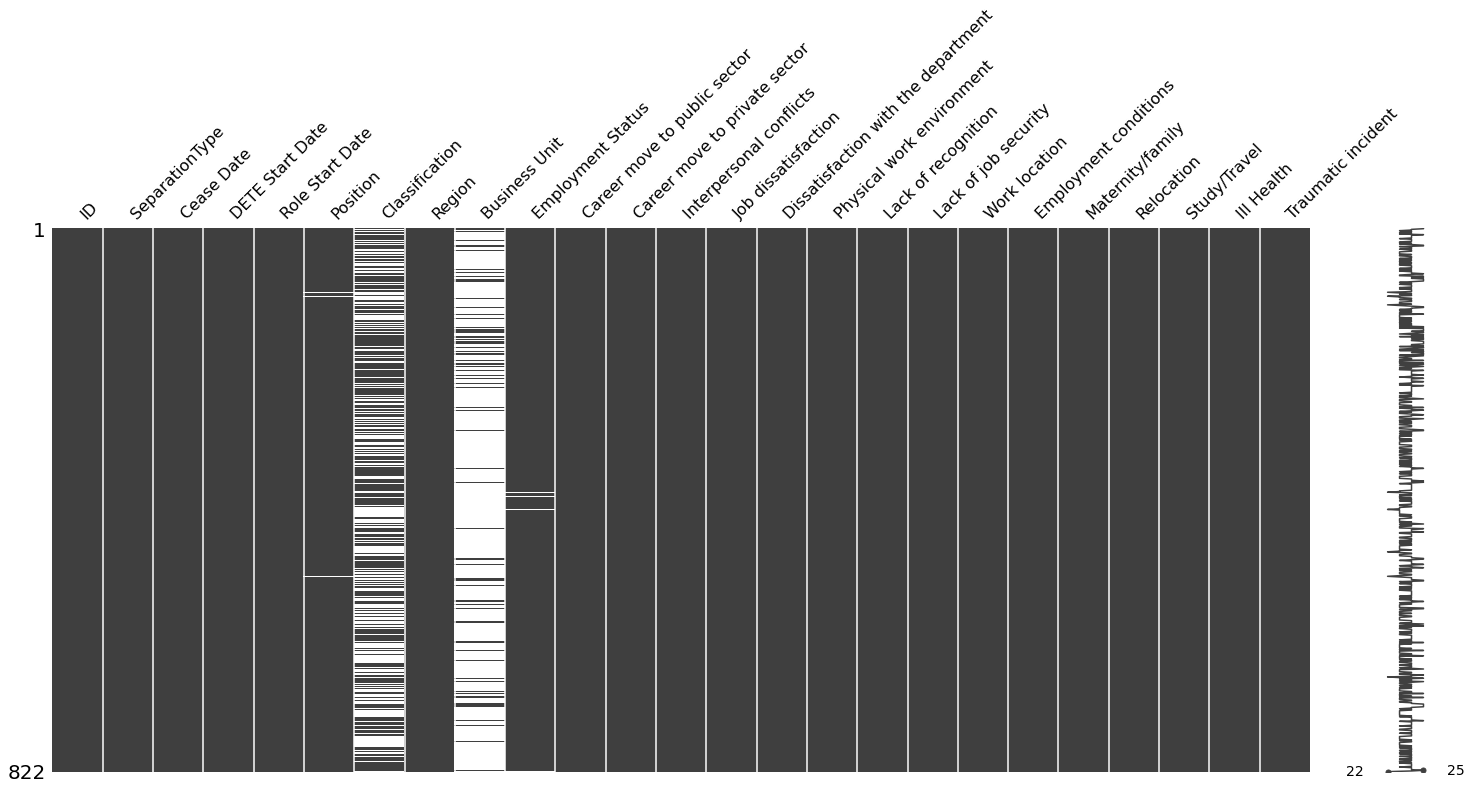

In [8]:
import missingno as msno      # Missingno Helps visualize missing values
%matplotlib inline
msno.matrix(dete_survey.iloc[:, 0:25])

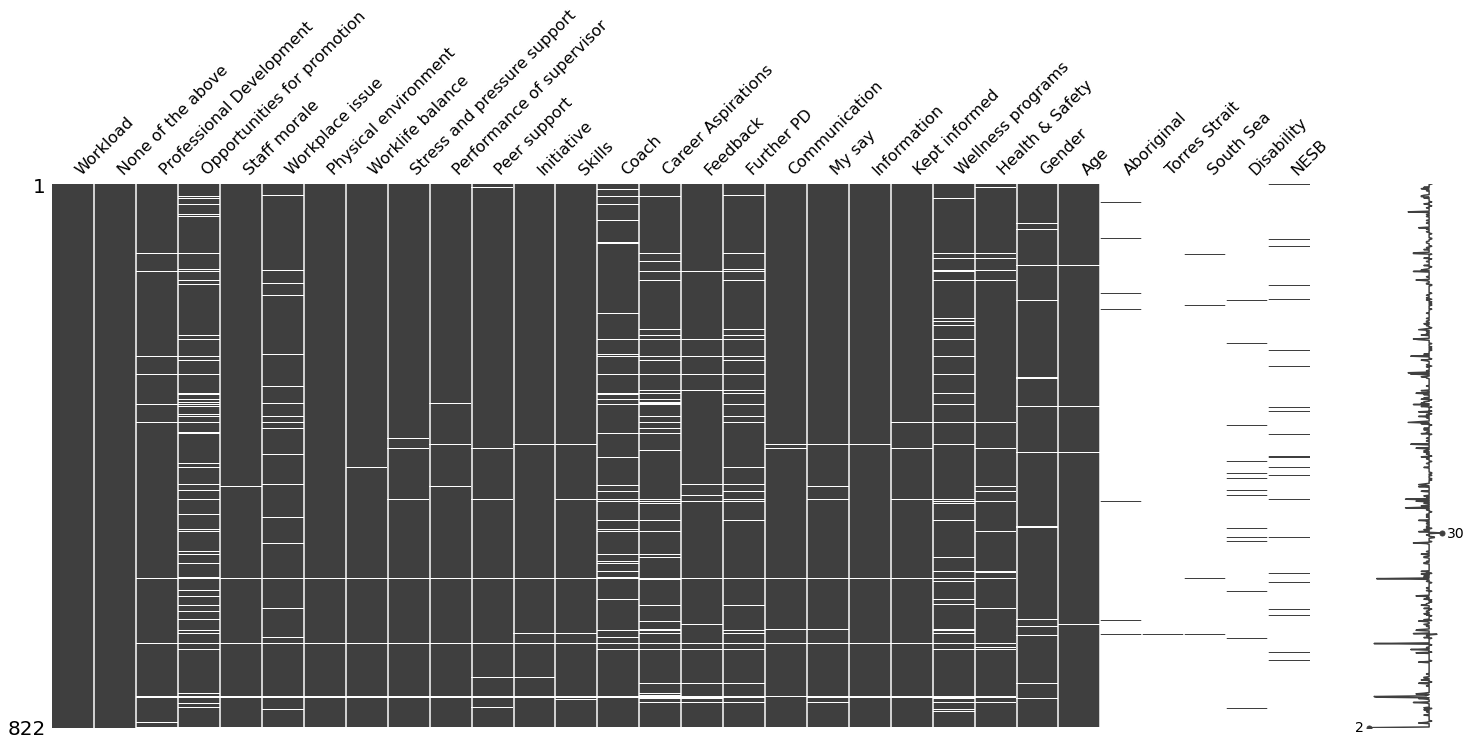

In [9]:
%matplotlib inline
msno.matrix(dete_survey.iloc[:, 26:57])

DETE  Matrix Missing Values breakdown 

Columns 1 to 25: Majority of the missing values comes from "Classification and Business Unit", date data has somoe missing values.

Columns 26 to 54 : The last 5 columns in this range have most, the rest have some missing. 

This will be helpfull when digging deaper into anylsis to see where missing data might affect. 


In [10]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [11]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    int64  
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [12]:
# Need to decrease length of column names to fit into plot
columns = tafe_survey.columns.str.split('.').str[0].tolist()
tafe_short = tafe_survey.copy()
tafe_short.columns = columns


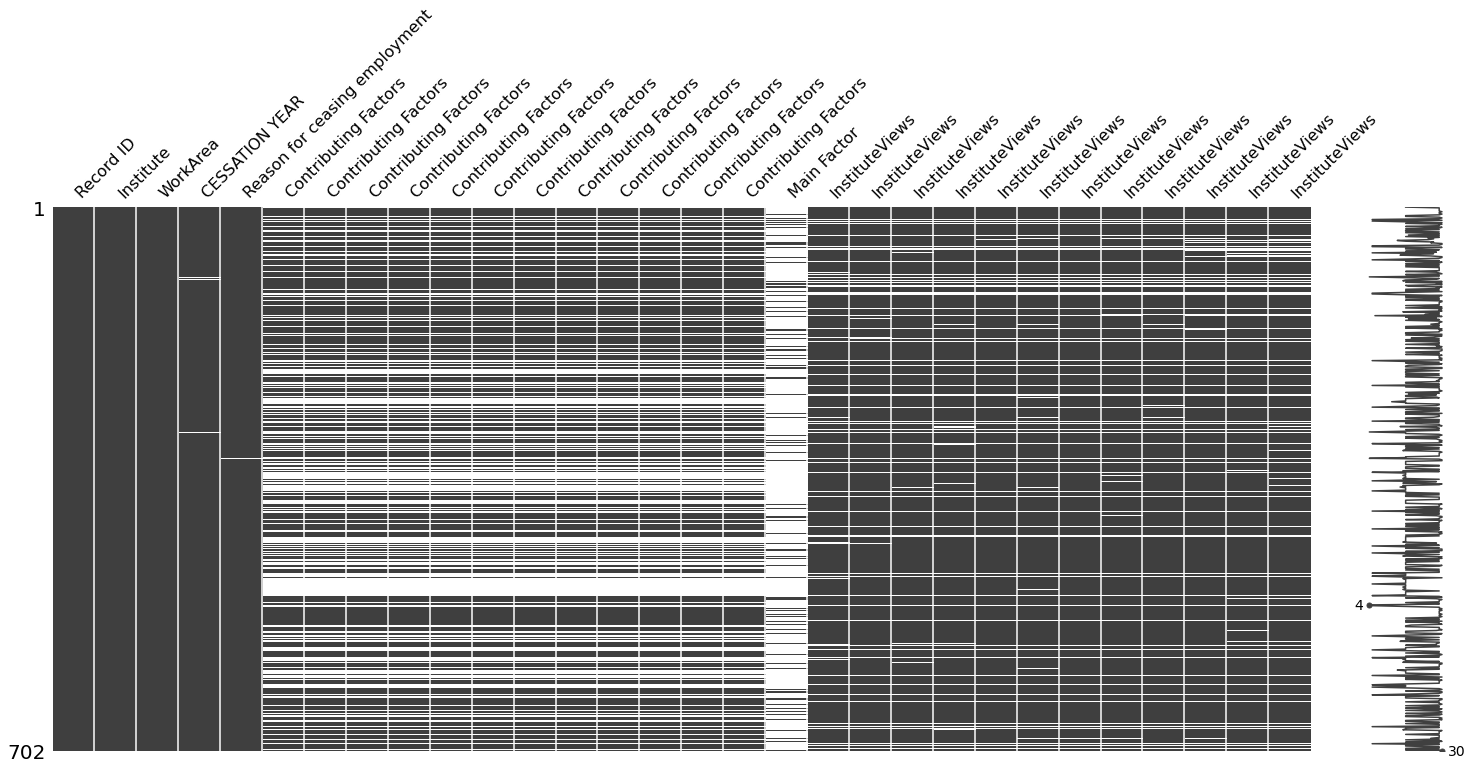

In [13]:
msno.matrix(tafe_short.iloc[:, 0:30])

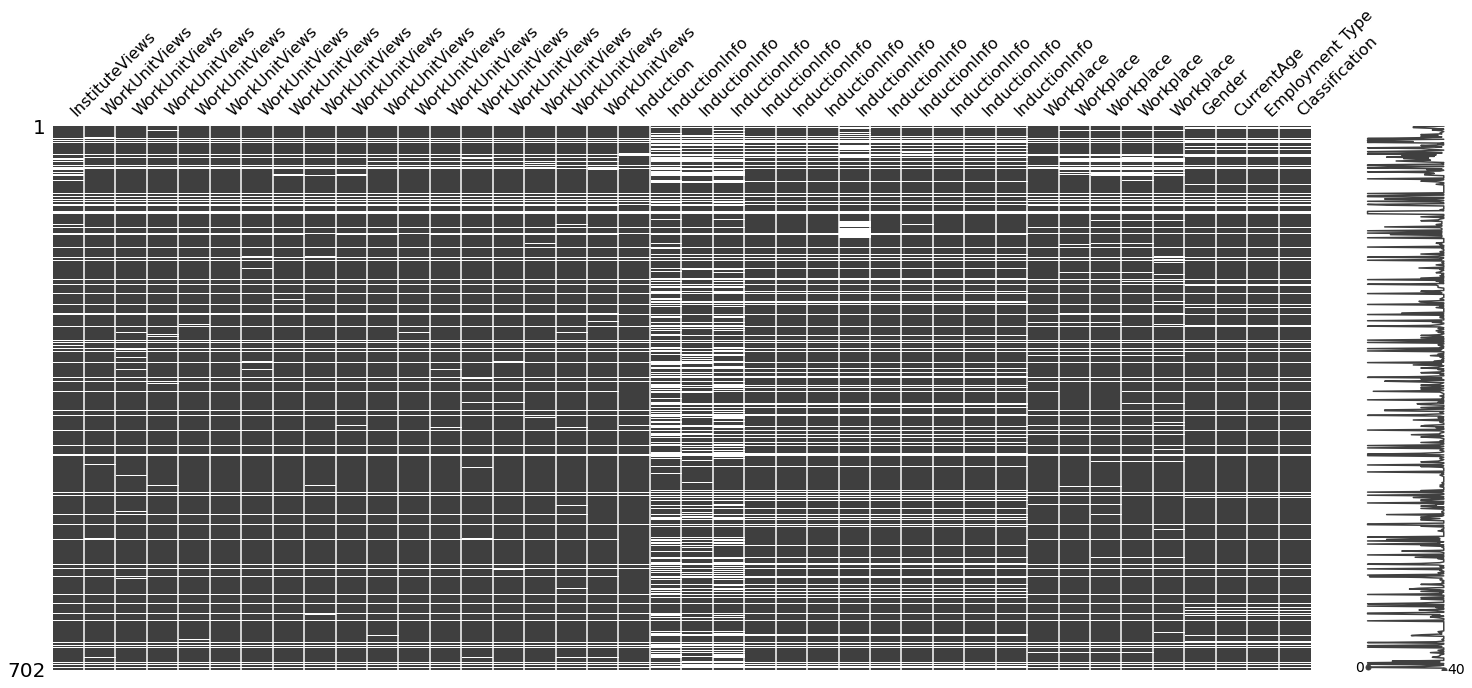

In [14]:
msno.matrix(tafe_short.iloc[:, 30:70])

TAFE Matrix Missing Values breakdown 

Columns 1 to 30: Majority of the missing values comes from "Contributing factors, and main factors" and some disbursment after.

Columns 30 to 70 : Here it is spread out between mose columns. 

In [15]:
print(dete_survey.isnull().sum())
print(tafe_survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [16]:
tafe_survey.shape

(702, 72)

Obeservation 1 - Early Data

There are several overall issues when observing the data, and this will need to be examnined and looked at further. 


*   In the DETE survey, there are several columns with null values that might not be important to the analysis. This data frame contatins "Not Stated' values but does not say NaN which makes it an issue. Although this could just mean that question was not applicable to certain people like for diasblity.  
*   In the TAFE survery, there are several coulmns that we might not need for our anaylsis. Also, big issue here is that some questions are unreadable, which we adjusted for our graph.
*   There are many diffrent questoins touching on several diffrent subjects, specfically multple ones on resigned due to dissatisifed. 






#Identify Missing Values and Drop Unneccessary Columns


In [17]:
dete_survey = pd.read_csv('dete.csv', na_values='Not Stated') # Read in data without Not Stated values as 'Nan"
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [18]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
# Remove the columns we do not need that dont pertain to " Dissatisfaction specifically"

In [19]:
#Check that columns were dropped
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

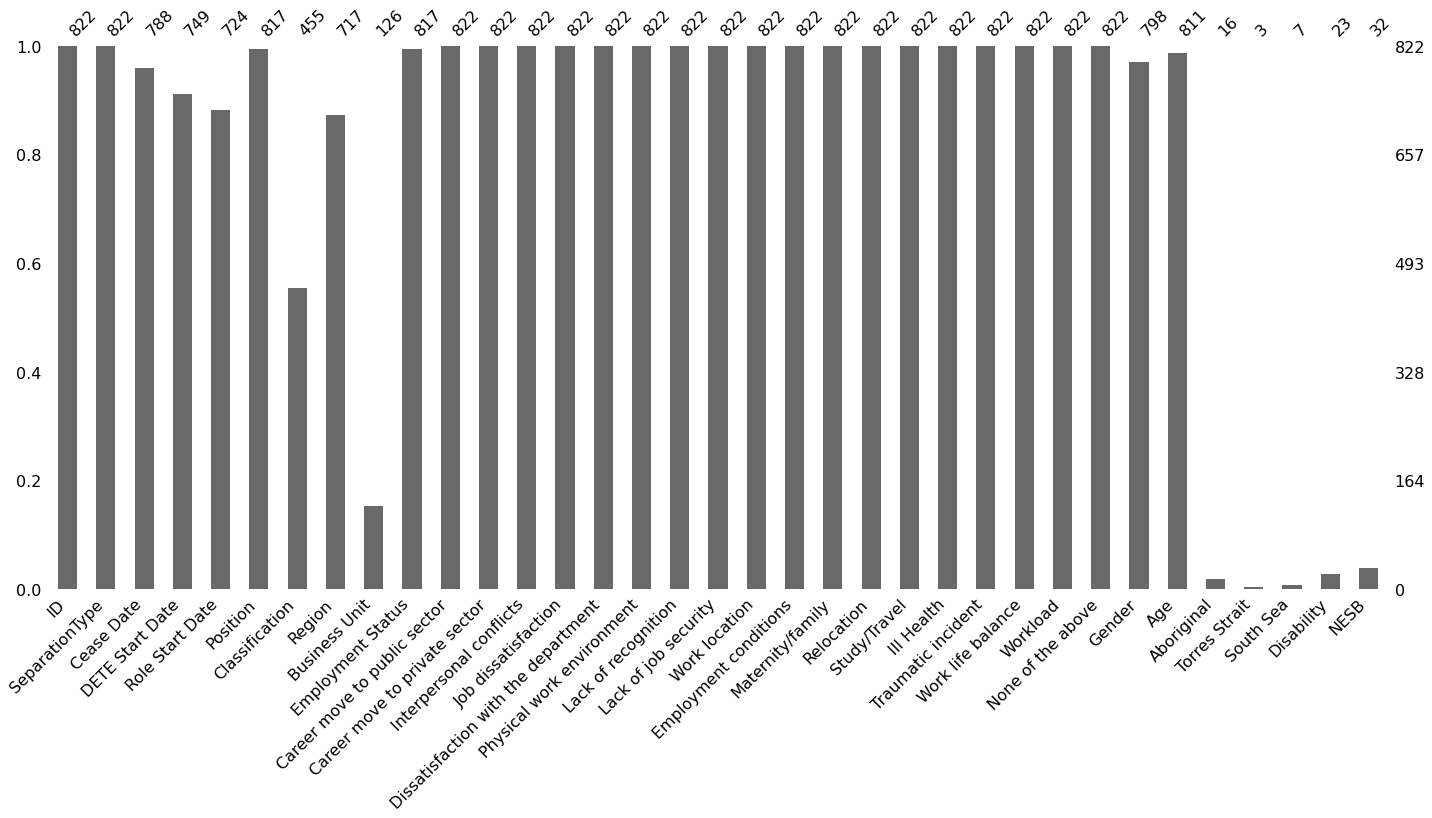

In [20]:
msno.bar(dete_survey_updated)

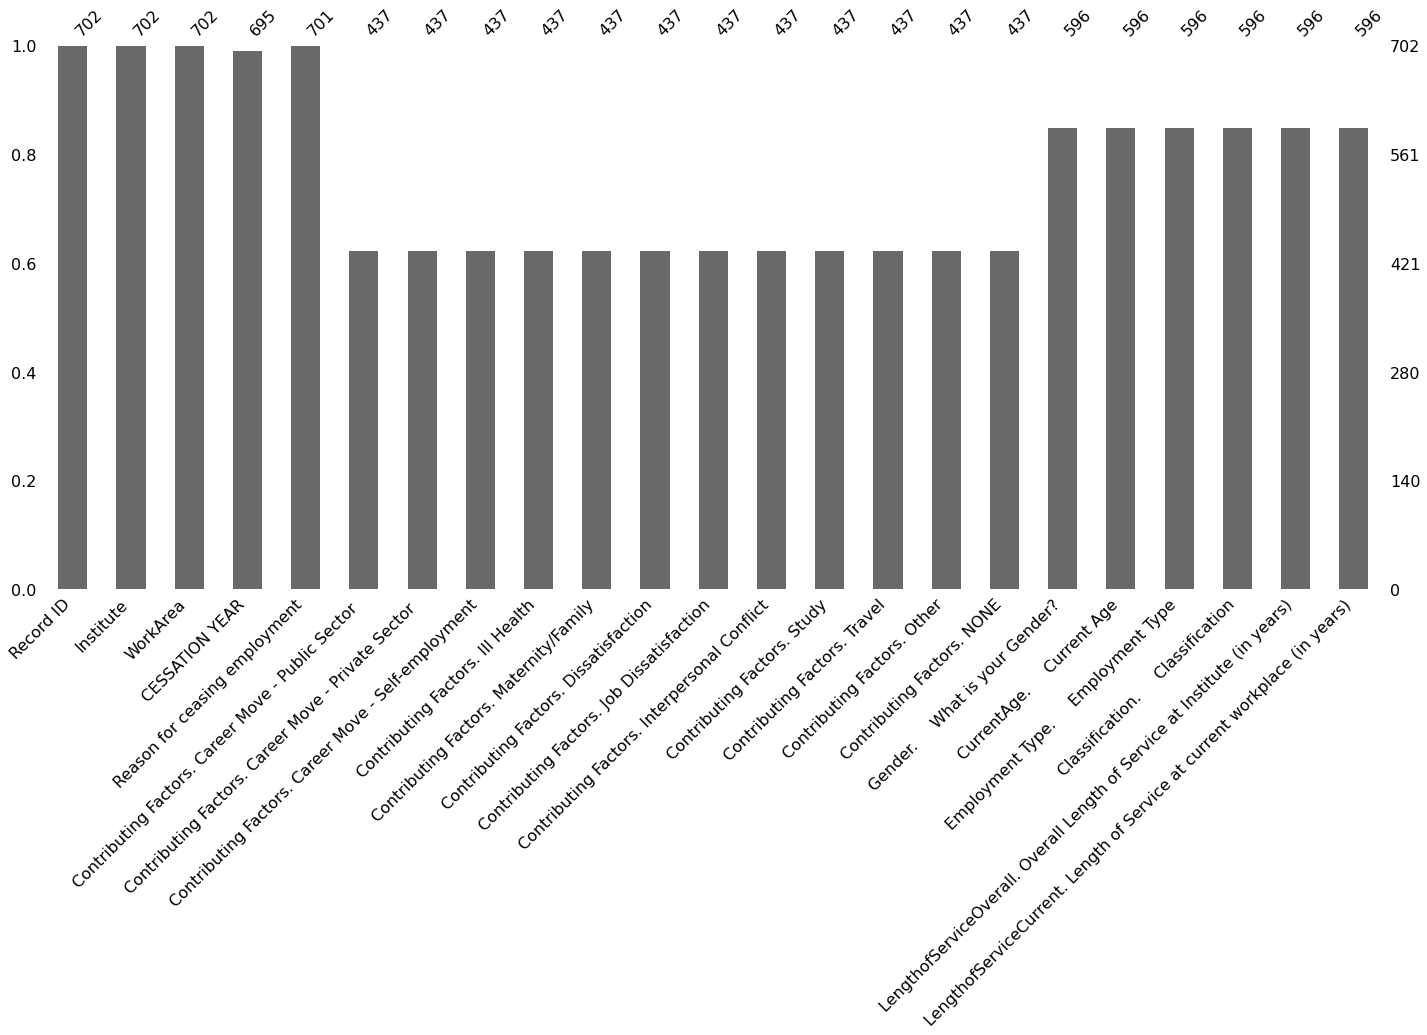

In [21]:
msno.bar(tafe_survey_updated)

In the Above two steps we were able to read in "DETE survey" from "Not Stated" into "NAN" which will make it much easier. Also we were able to put focus on find the link between dissatisfaction" specifically and other factors, we did this by removing unnecessary columns and focusing on specific data. We also visualizd the result again using the missingno tool set, using bar option and can help us see it. 

Next we will need to clean up the names for the columns and standerdize them because we will combine these survey data together.

#Changing Columns Names: 

We need to identify the data that we have in both data sets that are the same. 

In [22]:
# Clean column names and check if updated correctly 
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ","_")
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [23]:
# Update column names to match in dete_survey_updated
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object')

Above we were able to clean up the names for the columns and standerdize them because we will combine these survey data together. Also, the Columns names in the TAFE survery were very difficult to read so they would have needed to be adjuested anyway. Overall removing, these spaces and creating better columns names makes it easier to analyze now and in the future. 

Next steps is to focus on filltering the data for those who "Resigned" 

# Filter Data
 
 We will only analyze survey respondents who resigned, we'll only select separation types containing the string 'Resignation'.



In [24]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [25]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [26]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [27]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

Above we were able to combine certain info for DETE and filter the data for only the resignation separation types from each dataframe, which is the main part for this analysis. 



#Double check Data
 
 - Must clean and explore the cease_date and dete_start_date columns to make sure all of the years make sense. 

In [28]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [29]:
# Extract the years and convert them to a float type
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]

In [30]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

In [31]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [32]:
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [33]:
print(dete_resignations["dete_start_date"].value_counts().sort_index())

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64


In [34]:
print(tafe_resignations["cease_date"].value_counts())

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


In [35]:
tafe_resignations['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

Date Observation
*   In terms out number of resignations, for TAFE there have not been any since 2011 when compared to the previous years. WHile DETE shows a couple hundred since 2012. 
*   There seems to be large diffrences between TAFE and DETE in the dataframes, for example 2009 numbers do not match and in 2010 TAFE has a higher count of ceases. This would be an issue if we wanted to breakdown the yearly counts, but for now that is not something we are looking into. 



# Create New Column

Next Steps: To answer our original question, we will need to create a new column that holds this information. This new coulm will contain the length of time the employee spent at the workplace or number years of service in both TAFE and DETE.

In [36]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations["institute_service"].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

In [37]:
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

***institute_service Observation***

Above we calculate the years of service in the dete_survey_updated dataframe by subtracting the dete_start_date from the cease_date and create a new column named institute_service.

# Identify Dissatisfied Employees

We need to disect the information and identify any employees who resigned because they were dissatisfied. Each survey has diffrent columns that we will use to cateogirize employees as "dissatisfied" from tafe_survey_updated and dafe_survey_updated. Breakdown below:

  **1) tafe_survey_updated:**

      Contributing Factors. Dissatisfaction

      Contributing Factors. Job Dissatisfaction


  **2) dafe_survey_updated:**

      job_dissatisfaction

      dissatisfaction_with_the_department

      physical_work_environment

      lack_of_recognition

      lack_of_job_security

      work_location

      employment_conditions

      work_life_balance

      workload


A new coulmn will be created to hold the count of dissatisfied.After our changes, the new dissatisfied column will contain just the following values:



*   True: indicates a person resigned because they were dissatisfied in some way
*   False: indicates a person resigned because of a reason other than dissatisfaction with the job
*   NaN: indicates the value is missing






In [38]:
 print('Count -  TAFE Dissatisfaction')
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()   #count in tafe

Count -  TAFE Dissatisfaction


-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [39]:
 print('Count -  TAFE Job Dissatisfaction')
 tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

Count -  TAFE Job Dissatisfaction


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [40]:
# Update the values in the contributing factors columns to be either True, False, or NaN

def update_vals(v):
    if pd.isnull(v):
        return np.nan
    elif v == "-":
        return False
    else:
        return True

In [79]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
print( 'Unique values after the updates to TAFE')
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

Unique values after the updates to TAFE


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [80]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [81]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

***Dissatisfied Changes***

It was important to create a seprate column where we could group and generlize all the dissatisfaction columns in each dataframe. This will help us compare these data points when we combine them. 



# Combine Data

It will be helpfull to create a new column in each dataframe that will allow us to distinguish between the two. This coulmn will be called       "institute" in both

In [82]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [83]:
# Combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
Employment Type.     Employment Type                   290
CurrentAge.     Current Age                            290
Gender.     What is your Gender?                       290
Classification.     Classification                     290
gender                                                 302
age                                                    3

In [45]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis=1).copy()

In [46]:
combined.shape

(651, 57)

In [47]:
combined_updated.shape

(651, 6)

**combined_updated Explained**

We added  an institute column so that we can differentiate the data from each survey after we combine them. Then we dropped columns with less than 500 non null values, so we dropped around 80% of rows. 



#Clean the institute Service Column

the next step is to clean and categorize employees according to the following definitions:

*   New: Less than 3 years in the workplace
*   Experienced: 3-6 years in the workplace
*   Established: 7-10 years in the workplace
*   Veteran: 11 or more years in the workplace

The reason we do this is because understanding employee's needs according to career stage instead of age is more effective for analysis.



In [48]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
14.0                   6
10.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
25.0                   2
26.0                   2
28.0                   2
30.0                   2
36.0                   2


In [49]:
combined_updated["institute_service_up"] = combined_updated["institute_service"].astype("str").str.extract(r"(\d+)")  # Extract the years of service and convert the type to float
combined_updated["institute_service_up"] = combined_updated["institute_service_up"].astype("float")

In [50]:
combined_updated['institute_service_up'].value_counts(dropna=False)  # Check counts 

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [51]:
# Must change the years of service to cataogires outlined 
def service_cats(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

In [52]:
combined_updated["service_cat"] = combined_updated["institute_service_up"].apply(service_cats)

In [53]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

***Service Column Explained***

We were able to extract the years of service and convert it into a float,which helped us tranform that into the cataogires we outlined previously because understanding employee's needs according to career stage instead of age is more effective for analysis. 

# Analysis

In [54]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

**Answer to our Question :**

The Plot above shows the result we can answer to our question, the employees who resigning more is the ones that have 7 or more years than the ones that have less than 7 years. Further analysis can be done to answer further questions which be shown below. 

# Further Analysis


In [55]:
# Check the different values of service_cat column
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [56]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [57]:
table = pd.pivot_table(combined_updated, index='service_cat', values='dissatisfied')
table = table.sort_values(by=['dissatisfied'])

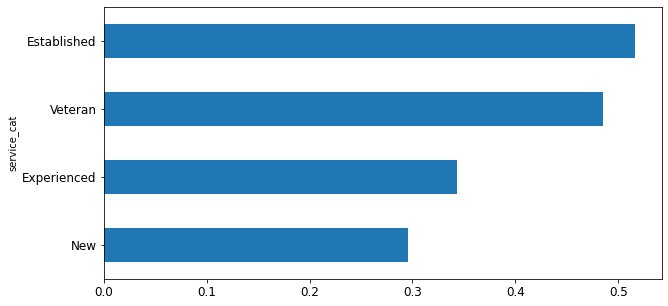

In [58]:
table.plot(kind='barh', legend=False, figsize=(10,5), fontsize=12)

In [61]:
dissatisfied_count = pd.pivot_table(combined_updated, index='service_cat', values='dissatisfied', aggfunc='sum')
dissatisfied_count = dissatisfied_count.sort_values(by=['dissatisfied'])
dissatisfied_count = dissatisfied_count.rename(columns={'dissatisfied':'dissatisfied_count'})
dissatisfied_count

,dissatisfied_count
service_cat,
Established,32
New,57
Experienced,59
Veteran,66


# Main Question Answred 

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. Further analysis, will be done below to answer more questions.



# Age Breakdown
The question we will answer is how many people in each group who resgined due to dissatisfaction.

Age groups below:

20s
30s
40s
50s
60+

In [71]:
combined_updated["service_cat"].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [77]:
combined["age"].value_counts(dropna=False)

NaN              345
41-45             48
46-50             42
36-40             41
26-30             35
51-55             32
21-25             29
31-35             29
56-60             26
61 or older       23
20 or younger      1
Name: age, dtype: int64

In [78]:
combined_updated.columns

Index(['id', 'separationtype', 'cease_date', 'institute_service',
       'dissatisfied', 'institute', 'institute_service_up', 'service_cat'],
      dtype='object')